IMPORT LIBRARY

In [1]:
import tensorflow as tf

SET GPU

In [2]:
def set_tensorflow_config(per_process_gpu_memory_fraction=1.0):
    config = tf.compat.v1.ConfigProto()
    # config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = per_process_gpu_memory_fraction
    config.gpu_options.allow_growth=True
    # sess = tf.Session(config=config)
    sess = tf.compat.v1.Session(config=config)
    
    print("== TensorFlow Config options set ==")
    print("\nThis process will now utilize {} GPU Memeory Fraction".format(per_process_gpu_memory_fraction))

In [3]:
set_tensorflow_config()

== TensorFlow Config options set ==

This process will now utilize 1.0 GPU Memeory Fraction


In [4]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

PREPARE DATA

In [6]:
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      zoom_range = 0.2,
      shear_range = 0.2,
      rotation_range = 20,
      horizontal_flip = True
      )

TRAINING_DIR = "../dataset-FER2013/dataset/histogram_equalization/training/"

TESTING_DIR = "../dataset-FER2013/dataset/histogram_equalization/testing/"
testing_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64, 64),
	class_mode='categorical',
    color_mode='grayscale'
)

test_generator = testing_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(64, 64),
	class_mode='categorical',
    color_mode='grayscale'
)

Found 19106 images belonging to 7 classes.
Found 4762 images belonging to 7 classes.


MODEL 1

In [7]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (8, 8), input_shape=(64,64,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(7, (7, 7), strides=(1, 1), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Softmax()
])

model_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 32)        2080      
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        65568     
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        65568     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        6

In [9]:
history1 = model_1.fit(train_generator, epochs=140, validation_data=test_generator)

Epoch 1/140
598/598 [==============================] - 110s 147ms/step - loss: 1.7230 - accuracy: 0.3630 - val_loss: 1.6622 - val_accuracy: 0.4225
Epoch 2/140
598/598 [==============================] - 71s 119ms/step - loss: 1.5510 - accuracy: 0.4319 - val_loss: 1.5071 - val_accuracy: 0.4525
Epoch 3/140
598/598 [==============================] - 82s 137ms/step - loss: 1.4792 - accuracy: 0.4594 - val_loss: 1.3850 - val_accuracy: 0.4950
Epoch 4/140
598/598 [==============================] - 41s 69ms/step - loss: 1.4152 - accuracy: 0.4871 - val_loss: 1.3666 - val_accuracy: 0.4994
Epoch 5/140
598/598 [==============================] - 38s 64ms/step - loss: 1.3570 - accuracy: 0.5028 - val_loss: 1.3450 - val_accuracy: 0.5183
Epoch 6/140
598/598 [==============================] - 39s 65ms/step - loss: 1.3256 - accuracy: 0.5092 - val_loss: 1.2565 - val_accuracy: 0.5344
Epoch 7/140
598/598 [==============================] - 35s 58ms/step - loss: 1.2923 - accuracy: 0.5198 - val_loss: 1.3062 - va

In [10]:
model_1.evaluate(test_generator)

149/149 [==============================] - 3s 17ms/step - loss: 1.0404 - accuracy: 0.6539


[1.040370225906372, 0.6539269089698792]

In [11]:
# Simpan model ke dalam file
model_1.save('m1_he.h5')

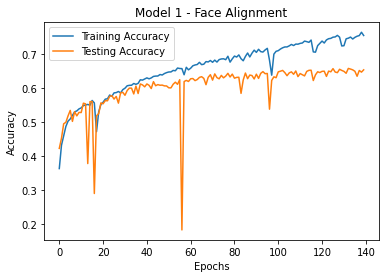

In [12]:
import matplotlib.pyplot as plt

# Train the model and collect training metrics
# history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Plot training metrics
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 1 - Face Alignment")
plt.show()

MODEL 2

In [9]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (8, 8), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(8, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(8, (8, 8), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(8, (8, 8), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(7, (7, 7), strides=(1, 1), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Softmax()
])


model_2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 57, 57, 32)        2080      
                                                                 
 batch_normalization_8 (Batc  (None, 57, 57, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 32)        65568     
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 32)        65568     
                                                                 
 batch_normalization_9 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 15, 15, 32)       

In [26]:
history2 = model_2.fit(train_generator, epochs=140, validation_data=test_generator)

Epoch 1/140
598/598 [==============================] - 26s 41ms/step - loss: 1.7394 - accuracy: 0.3576 - val_loss: 1.6301 - val_accuracy: 0.4315
Epoch 2/140
598/598 [==============================] - 24s 40ms/step - loss: 1.5339 - accuracy: 0.4319 - val_loss: 1.4810 - val_accuracy: 0.4511
Epoch 3/140
598/598 [==============================] - 24s 41ms/step - loss: 1.4570 - accuracy: 0.4540 - val_loss: 1.4221 - val_accuracy: 0.4578
Epoch 4/140
598/598 [==============================] - 24s 41ms/step - loss: 1.4050 - accuracy: 0.4663 - val_loss: 1.4436 - val_accuracy: 0.4492
Epoch 5/140
598/598 [==============================] - 24s 41ms/step - loss: 1.3680 - accuracy: 0.4768 - val_loss: 1.3527 - val_accuracy: 0.4708
Epoch 6/140
598/598 [==============================] - 24s 41ms/step - loss: 1.3379 - accuracy: 0.4874 - val_loss: 1.3141 - val_accuracy: 0.5055
Epoch 7/140
598/598 [==============================] - 24s 39ms/step - loss: 1.3414 - accuracy: 0.4940 - val_loss: 1.3249 - val_ac

In [27]:
model_2.evaluate(test_generator)

149/149 [==============================] - 3s 18ms/step - loss: 1.0443 - accuracy: 0.6126


[1.0442814826965332, 0.6125577688217163]

In [16]:
# Simpan model ke dalam file
model_2.save('m2_align.h5')

Text(0.5, 1.0, 'Model 2 - Face Alignment')

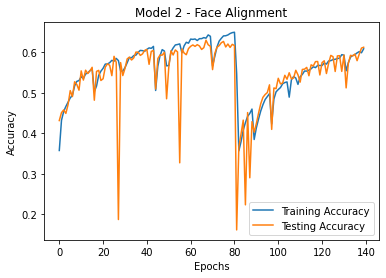

In [28]:
import matplotlib.pyplot as plt

# Train the model and collect training metrics
# history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Plot training metrics
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 2 - Face Alignment")